<a href="https://colab.research.google.com/github/iesous-kurios/DS-Unit-1-Sprint-1-Dealing-With-Data/blob/master/module3-databackedassertions/GJW_LS_DS_113_Making_Data_backed_Assertions_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lambda School Data Science - Making Data-backed Assertions

This is, for many, the main point of data science - to create and support reasoned arguments based on evidence. It's not a topic to master in a day, but it is worth some focused time thinking about and structuring your approach to it.

## Assignment - what's going on here?

Consider the data in `persons.csv` (already prepared for you, in the repo for the week). It has four columns - a unique id, followed by age (in years), weight (in lbs), and exercise time (in minutes/week) of 1200 (hypothetical) people.

Try to figure out which variables are possibly related to each other, and which may be confounding relationships.

Try and isolate the main relationships and then communicate them using crosstabs and graphs. Share any cool graphs that you make with the rest of the class in Slack!

In [34]:
# TODO - your code here
# Use what we did live in lecture as an example

# HINT - you can find the raw URL on GitHub and potentially use that
# to load the data with read_csv, or you can upload it yourself

# import pandas to play with data
# and matplotlib for cool graphing stuff
import pandas as pd
import matplotlib.pyplot as plt

# load url into a variable
url = 'https://raw.githubusercontent.com/LambdaSchool/DS-Unit-1-Sprint-1-Dealing-With-Data/master/module3-databackedassertions/persons.csv'

# create dataframe with url variable
# manually enter in feature names
df = pd.read_csv(url, names=["", "age", "weight", "exercise_time"])

df.head(10)


,,age,weight,exercise_time
0,NaN,age,weight,exercise_time
1,0.0,44,118,192
2,1.0,41,161,35
3,2.0,46,128,220
4,3.0,39,216,57
5,4.0,28,116,182
6,5.0,58,103,165
7,6.0,55,161,107
8,7.0,21,188,37
9,8.0,55,216,79


In [35]:
df.shape

(1201, 4)

In [46]:
df['exercise_time']

0       exercise_time
1                 192
2                  35
3                 220
4                  57
5                 182
6                 165
7                 107
8                  37
9                  79
10                267
11                228
12                 78
13                 44
14                 48
15                171
16                194
17                191
18                147
19                271
20                111
21                 28
22                 24
23                267
24                241
25                181
26                 21
27                229
28                 38
29                110
            ...      
1171              102
1172              158
1173              252
1174              142
1175              244
1176               86
1177              103
1178              103
1179              118
1180              184
1181              147
1182               18
1183              256
1184              198
1185      

In [37]:
df['weight'].value_counts()

113       20
108       19
137       19
125       18
126       17
124       17
128       17
140       16
156       16
199       15
144       15
127       15
116       15
136       15
154       15
100       15
117       14
131       14
110       14
129       14
153       13
102       13
139       13
138       13
147       13
150       13
182       13
120       13
122       13
160       13
          ..
231        3
236        3
222        3
226        3
230        3
196        3
217        3
219        3
179        3
225        2
237        2
234        2
215        2
241        2
207        2
220        1
228        1
242        1
246        1
221        1
238        1
233        1
244        1
weight     1
223        1
239        1
201        1
227        1
224        1
240        1
Name: weight, Length: 144, dtype: int64

In [38]:
df['age'].value_counts()

41     32
34     29
69     28
71     27
33     26
29     26
38     25
28     24
55     24
57     24
19     23
51     23
64     23
61     22
59     22
40     22
47     22
49     22
39     21
23     21
44     21
67     21
35     21
30     21
52     20
68     20
32     20
18     20
74     20
80     19
       ..
25     19
31     19
21     18
75     18
72     18
20     17
24     17
56     17
76     16
66     16
48     16
27     16
65     15
58     15
79     15
62     15
37     15
36     15
26     15
54     14
78     14
50     13
43     13
77     13
60     13
46     13
53     12
45     10
42      8
age     1
Name: age, Length: 64, dtype: int64

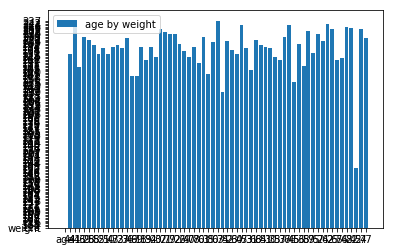

In [53]:
plt.bar(df['age'], df['weight'], label='age by weight')
# plt.bar(df['age'], df['exercise_time'], label='age by ex')
plt.legend(loc='best')
plt.show()

In [54]:
pd.pivot_table(df, index='weight', aggfunc='mean')

,
weight,
100,597.333333
101,583.600000
102,662.153846
103,683.750000
104,680.222222
105,721.300000
106,510.625000
107,643.454545
108,623.894737


In [66]:
df['ages'] = df['age'].value_counts()
df['weights'] = df['weight'].value_counts()
df['ex_times'] = df['exercise_time'].value_counts()

print(df['exercise_time'].value_counts())

21               12
93               12
96               11
17               11
147              10
219              10
89                9
67                9
103               9
80                9
87                8
170               8
31                8
110               8
54                7
79                7
30                7
36                7
35                7
2                 7
65                7
91                7
117               7
69                7
5                 7
182               7
66                7
161               7
289               7
78                7
                 ..
299               2
210               2
123               2
193               2
233               1
39                1
290               1
58                1
11                1
286               1
294               1
exercise_time     1
202               1
268               1
60                1
255               1
177               1
283               1
237               1


In [63]:
pd.pivot_table(df, index=['ages', 'weights'], values='ex_times')

,
ages,weights


### Assignment questions

After you've worked on some code, answer the following questions in this text block:

1.  What are the variable types in the data?
2.  What are the relationships between the variables?
3.  Which relationships are "real", and which spurious?


## Stretch goals and resources

Following are *optional* things for you to take a look at. Focus on the above assignment first, and make sure to commit and push your changes to GitHub.

- [Spurious Correlations](http://tylervigen.com/spurious-correlations)
- [NIH on controlling for confounding variables](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4017459/)

Stretch goals:

- Produce your own plot inspired by the Spurious Correlation visualizations (and consider writing a blog post about it - both the content and how you made it)
- Pick one of the techniques that NIH highlights for confounding variables - we'll be going into many of them later, but see if you can find which Python modules may help (hint - check scikit-learn)